## GEM and HOPS trajectory overlaid

In [2]:
import matplotlib.pyplot as plt
import matplotlib.colors as clr
from tifffile import imread
import pandas as pd
import ast

In [3]:
# Define file paths for GEM
gem_tif_path = r"Z:\Bisal_Halder_turbo\PROCESSED_DATA\Impact_of_cytoskeleton_on_HOPS_condensates\GEM tracking\GEM_HOPS Cotracking\Representative image\C2-GEM_cropped.tif"
gem_csv_path = r"Z:\Bisal_Halder_turbo\PROCESSED_DATA\Impact_of_cytoskeleton_on_HOPS_condensates\GEM tracking\GEM_HOPS Cotracking\Representative image\C2-GEM_spots_cropped_reformatted.csv"

# Define file paths for HOPS
hops_tif_path = r"Z:\Bisal_Halder_turbo\PROCESSED_DATA\Impact_of_cytoskeleton_on_HOPS_condensates\GEM tracking\GEM_HOPS Cotracking\Representative image\C1-HOPS_cropped.tif"
hops_csv_path = r"Z:\Bisal_Halder_turbo\PROCESSED_DATA\Impact_of_cytoskeleton_on_HOPS_condensates\GEM tracking\GEM_HOPS Cotracking\Representative image\C1-HOPS_spots_cropped_reformatted.csv"

# Load TIFF files
gem_img = imread(gem_tif_path)
hops_img = imread(hops_tif_path)

# Load CSV files
gem_df = pd.read_csv(gem_csv_path)
hops_df = pd.read_csv(hops_csv_path)


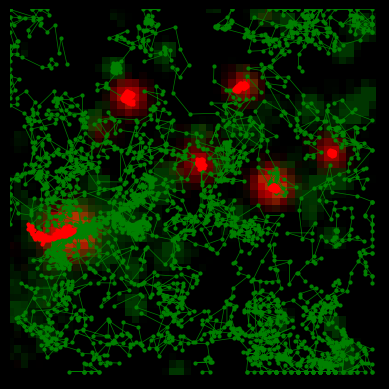

In [5]:
# Constants for scalebar, adjust as necessary
um_per_pixel = 0.117
scalebar_length_um = 1
scalebar_color = 'white'
# Define colormaps
cmap_gem = clr.LinearSegmentedColormap.from_list("green", ["black", "lime"])
cmap_hops = clr.LinearSegmentedColormap.from_list("red", ["black", "red"])
# Define vmin and vmax for contrast control
vmin_gem, vmax_gem = 8000, 20000
vmin_hops, vmax_hops = 600,1200
# Start plotting
fig, ax = plt.subplots()
# Set background to black
fig.patch.set_facecolor('black')
ax.set_facecolor('black')

# Display the GEM TIFF image (first frame)
ax.imshow(gem_img[0], cmap=cmap_gem, vmin=vmin_gem, vmax=vmax_gem, alpha=0.7)

# Display the HOPS TIFF image (first frame), blending with GEM
ax.imshow(hops_img[0], cmap=cmap_hops, vmin=vmin_hops, vmax=vmax_hops, alpha=0.7)
# plt.text(1, 49, "GEM", color="cyan", weight="bold", size=14)
# plt.text(1, 45, "HOPS", color="red", weight="bold", size=14)

# Plot GEM trajectories
unique_gem_ids = gem_df["trackID"].unique()
for track_id in unique_gem_ids:
    track_points = gem_df[gem_df["trackID"] == track_id]
    x_gem = track_points["x"].to_numpy(float)
    y_gem = track_points["y"].to_numpy(float)
    ax.plot(x_gem, y_gem, "-o", color="green", markersize=2, lw=0.5)

# Plot HOPS trajectories
unique_hops_ids = hops_df["trackID"].unique()
for track_id in unique_hops_ids:
    track_points = hops_df[hops_df["trackID"] == track_id]
    x_hops = track_points["x"].to_numpy(float)
    y_hops = track_points["y"].to_numpy(float)
    ax.plot(x_hops, y_hops, "-o", color="red", markersize=2, lw=0.5)

# Remove axis ticks and show image
ax.set_xticks([])
ax.set_yticks([])
ax.set_xlim([0, hops_img[0].shape[1]])
ax.set_ylim([hops_img[0].shape[0], 0])
# Calculate scalebar length in pixels
scalebar_length_pxl = scalebar_length_um / um_per_pixel

# Manually position the scalebar
base_x = 40  # Adjust this value to move the scalebar horizontally
# base_y = max(gem_df["y"].max(), hops_df["y"].max()) - 20  # Adjust this value to move it vertically
base_y = 48
# ax.plot(
#     [base_x, base_x + scalebar_length_pxl],
#     [base_y, base_y],
#     "-", color=scalebar_color, lw=5
# )

plt.tight_layout

save_path = r"Z:\Bisal_Halder_turbo\PROCESSED_DATA\Impact_of_cytoskeleton_on_HOPS_condensates\GEM tracking\GEM_HOPS Cotracking\Representative image\representative_trajectory_HOPS_GEM_tif_objects_overlay.png"
fig.savefig(save_path, dpi=300, bbox_inches='tight')

plt.axis('off')
plt.show()

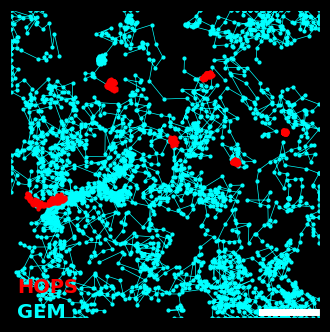

In [68]:
import matplotlib.pyplot as plt
import pandas as pd

# Define file paths for GEM
gem_csv_path = r"Z:\Bisal_Halder_turbo\PROCESSED_DATA\Impact_of_cytoskeleton_on_HOPS_condensates\GEM tracking\GEM_HOPS Cotracking\Representative image\C2-GEM_spots_cropped_reformatted.csv"

# Define file paths for HOPS
hops_csv_path = r"Z:\Bisal_Halder_turbo\PROCESSED_DATA\Impact_of_cytoskeleton_on_HOPS_condensates\GEM tracking\GEM_HOPS Cotracking\Representative image\C1-HOPS_spots_cropped_reformatted.csv"

# Constants for scalebar, adjust as necessary
um_per_pixel = 0.117
scalebar_length_um = 1
scalebar_color = 'white'

# Load CSV files
gem_df = pd.read_csv(gem_csv_path)
hops_df = pd.read_csv(hops_csv_path)

# Start plotting
fig, ax = plt.subplots(figsize=(4, 4))

# Set background to black
fig.patch.set_facecolor('black')
ax.set_facecolor('black')

# Plot GEM trajectories
unique_gem_ids = gem_df["trackID"].unique()
for track_id in unique_gem_ids:
    track_points = gem_df[gem_df["trackID"] == track_id]
    x_gem = track_points["x"].to_numpy(float)
    y_gem = track_points["y"].to_numpy(float)
    ax.plot(x_gem, y_gem, "-o", color="cyan", markersize=2, lw=0.5)

# Plot HOPS trajectories
unique_hops_ids = hops_df["trackID"].unique()
for track_id in unique_hops_ids:
    track_points = hops_df[hops_df["trackID"] == track_id]
    x_hops = track_points["x"].to_numpy(float)
    y_hops = track_points["y"].to_numpy(float)
    ax.plot(x_hops, y_hops, "-o", color="red", markersize=2, lw=0.5)

plt.text(1, 49, "GEM", color="cyan", weight="bold", size=14)
plt.text(1, 45, "HOPS", color="red", weight="bold", size=14)

# Remove axis ticks for cleaner look
ax.set_xticks([])
ax.set_yticks([])

# Optionally set limits if known
ax.set_xlim([0, max(gem_df["x"].max(), hops_df["x"].max())])
ax.set_ylim([max(gem_df["y"].max(), hops_df["y"].max()), 0])

# Set the same aspect ratio as the image
ax.set_aspect('equal', adjustable='datalim')

# Calculate scalebar length in pixels
scalebar_length_pxl = scalebar_length_um / um_per_pixel

# Manually position the scalebar
base_x = 40  # Adjust this value to move the scalebar horizontally
# base_y = max(gem_df["y"].max(), hops_df["y"].max()) - 20  # Adjust this value to move it vertically
base_y = 48
ax.plot(
    [base_x, base_x + scalebar_length_pxl],
    [base_y, base_y],
    "-", color=scalebar_color, lw=5
)

plt.tight_layout

# # Adjust subplot parameters for tighter layout
# fig.subplots_adjust(left=0.05, right=0.95, top=0.95, bottom=0.05)

# Save the figure to a file
save_path = r"Z:\Bisal_Halder_turbo\PROCESSED_DATA\Impact_of_cytoskeleton_on_HOPS_condensates\GEM tracking\GEM_HOPS Cotracking\Representative image\representative_trajectory_HOPS_GEM_overlay.png"
fig.savefig(save_path, dpi=300, bbox_inches='tight')

plt.show()

## Change of the color of the trajectory with time

C:\Users\bisal\AppData\Local\Temp\2\ipykernel_28968\1110949392.py:97: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


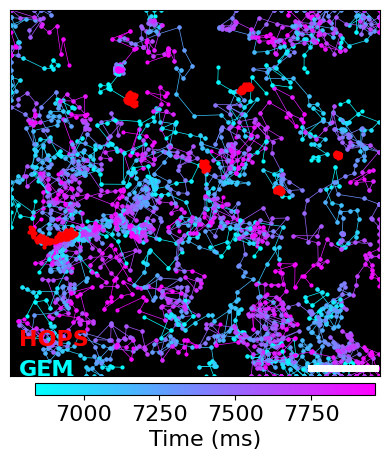

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Define file paths for GEM
gem_csv_path = r"Z:\Bisal_Halder_turbo\PROCESSED_DATA\Impact_of_cytoskeleton_on_HOPS_condensates\GEM tracking\GEM_HOPS Cotracking\Representative image\C2-GEM_spots_cropped_reformatted.csv"
# Define file paths for HOPS
hops_csv_path = r"Z:\Bisal_Halder_turbo\PROCESSED_DATA\Impact_of_cytoskeleton_on_HOPS_condensates\GEM tracking\GEM_HOPS Cotracking\Representative image\C1-HOPS_spots_cropped_reformatted.csv"

# Constants for scalebar, adjust as necessary
um_per_pixel = 0.117
scalebar_length_um = 1
scalebar_length_pxl = scalebar_length_um / um_per_pixel
scalebar_color = 'white'

# Load CSV files
gem_df = pd.read_csv(gem_csv_path)
hops_df = pd.read_csv(hops_csv_path)

# Start plotting
fig, ax = plt.subplots(figsize=(4, 4))

# Set background to black
fig.patch.set_facecolor('white')
ax.set_facecolor('black')

# Plot GEM trajectories with color changes over time
unique_gem_ids = gem_df["trackID"].unique()
for track_id in unique_gem_ids:
    frame_values = gem_df[gem_df["trackID"] == track_id]["t"].to_numpy()
    time_values = frame_values * 40  # Convert frames to milliseconds
    track_points = gem_df[gem_df["trackID"] == track_id]
    x_gem = track_points["x"].to_numpy(float)
    y_gem = track_points["y"].to_numpy(float)

    norm = plt.Normalize(time_values.min(), time_values.max())
    colors = plt.cm.cool(norm(time_values))  # Changed to Viridis colormap

    for i in range(len(x_gem) - 1):
        ax.plot(x_gem[i:i+2], y_gem[i:i+2], '-o', color=colors[i], markersize=2, lw=0.5)

# Plot HOPS trajectories
unique_hops_ids = hops_df["trackID"].unique()
for track_id in unique_hops_ids:
    track_points = hops_df[hops_df["trackID"] == track_id]
    x_hops = track_points["x"].to_numpy(float)
    y_hops = track_points["y"].to_numpy(float)
    ax.plot(x_hops, y_hops, "-o", color="red", markersize=2, lw=0.5)

plt.text(1, 49, "GEM", color="cyan", weight="bold", size=16)
plt.text(1, 45, "HOPS", color="red", weight="bold", size=16)

# Remove axis ticks for cleaner look
ax.set_xticks([])
ax.set_yticks([])

# Define parameters to ensure square plot
x_min, x_max = min(gem_df['x'].min(), hops_df['x'].min()), max(gem_df['x'].max(), hops_df['x'].max())
y_min, y_max = min(gem_df['y'].min(), hops_df['y'].min()), max(gem_df['y'].max(), hops_df['y'].max())

x_range = x_max - x_min
y_range = y_max - y_min
max_range = max(x_range, y_range)

x_center = (x_max + x_min) / 2
y_center = (y_max + y_min) / 2

x_min, x_max = x_center - max_range / 2, x_center + max_range / 2
y_min, y_max = y_center - max_range / 2, y_center + max_range / 2

# Set limits to ensure a square plot
ax.set_xlim(x_min, x_max)
ax.set_ylim(y_max, y_min) 

# Set the same aspect ratio as the image
ax.set_aspect('equal', adjustable='datalim')

# Manually position the scalebar
base_x = 40  # Adjust this value to move the scalebar horizontally
base_y = 48  # Adjust this value to move it vertically
ax.plot(
    [base_x, base_x + scalebar_length_pxl],
    [base_y, base_y],
    "-", color=scalebar_color, lw=5
)

# Create a colorbar that represents time in milliseconds
cbar_ax = fig.add_axes([0.1, 0.0005, 0.85, 0.03])  # Adjust the position and size of the colorbar
sm = plt.cm.ScalarMappable(cmap=plt.cm.cool, norm=norm)  # Changed to Viridis colormap
sm.set_array([])
cbar = fig.colorbar(sm, cax=cbar_ax, orientation='horizontal')
cbar.set_label('Time (ms)', color='black', fontsize = 16)
cbar.ax.xaxis.set_tick_params(color='black', labelsize = 16)
cbar.outline.set_edgecolor('black')
plt.setp(plt.getp(cbar.ax.axes, 'xticklabels'), color='black')

plt.tight_layout()

# Save the figure to a file
save_path = r"Z:\Bisal_Halder_turbo\PROCESSED_DATA\Impact_of_cytoskeleton_on_HOPS_condensates\GEM tracking\GEM_HOPS Cotracking\Representative image\representative_trajectory_HOPS_GEM_overlay.png"
fig.savefig(save_path, dpi=300, bbox_inches='tight', facecolor='white')

plt.show()

## Color of the trajectory based on the start time

C:\Users\bisal\AppData\Local\Temp\2\ipykernel_29612\2156621321.py:125: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout(rect=[0.05, 0.12, 0.95, 1])  # Adjust rect for extra bottom space


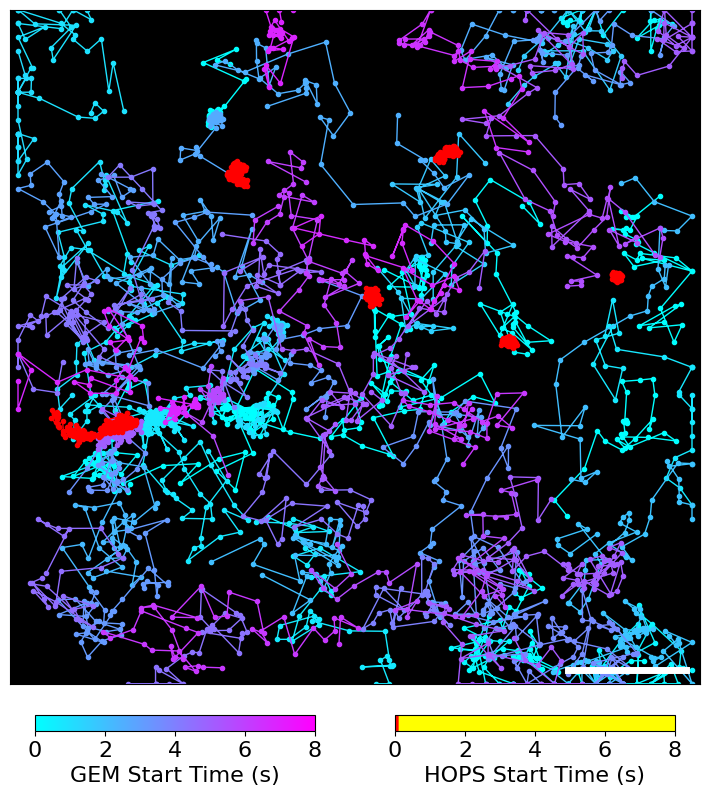

In [51]:
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import pandas as pd
import numpy as np

# Define file paths for GEM
gem_csv_path = r"Z:\Bisal_Halder_turbo\PROCESSED_DATA\Impact_of_cytoskeleton_on_HOPS_condensates\GEM tracking\GEM_HOPS Cotracking\Representative image\C2-GEM_spots_cropped_reformatted.csv"
# Define file paths for HOPS
hops_csv_path = r"Z:\Bisal_Halder_turbo\PROCESSED_DATA\Impact_of_cytoskeleton_on_HOPS_condensates\GEM tracking\GEM_HOPS Cotracking\Representative image\C1-HOPS_spots_cropped_reformatted.csv"

# Constants for scalebar, adjust as necessary
um_per_pixel = 0.117
scalebar_length_um = 1
scalebar_length_pxl = scalebar_length_um / um_per_pixel
scalebar_color = 'white'

# Load CSV files
gem_df = pd.read_csv(gem_csv_path)
hops_df = pd.read_csv(hops_csv_path)

# Define total imaging duration in seconds
total_duration_s = 8  # Total imaging duration in seconds

# Start plotting
fig, ax = plt.subplots(figsize=(8, 8), facecolor='white')

# Set only the axes background to black
fig.patch.set_facecolor('white')
ax.set_facecolor('black')

# Prepare colormap normalization for a fixed range
norm = plt.Normalize(0, total_duration_s)

# Plot GEM trajectories with color based on appearance time
unique_gem_ids = gem_df["trackID"].unique()
start_times_gem = gem_df.groupby("trackID")["t"].min()  # Get start time for each trajectory

for track_id in unique_gem_ids:
    track_points = gem_df[gem_df["trackID"] == track_id]
    x_gem = track_points["x"].to_numpy(float)
    y_gem = track_points["y"].to_numpy(float)
    
    start_time = start_times_gem.loc[track_id] * 0.04  # Convert start frame to seconds
    color = plt.cm.cool(norm(start_time))  # Use the start time to determine the color

    ax.plot(x_gem, y_gem, '-o', color=color, markersize=3, lw=1)

# Custom color map for HOPS with frames 0-4 colored red
cmap_hops = mcolors.LinearSegmentedColormap.from_list(
    'custom_hops',
    [(0, 'red'), (2/200, 'red'), (3/200, 'yellow'), (1, 'yellow')]
)

# Normalize with respect to the total duration
norm_hops = plt.Normalize(0, total_duration_s)

# Plot HOPS trajectories
unique_hops_ids = hops_df["trackID"].unique()
start_times_hops = hops_df.groupby("trackID")["t"].min()  # Get start time for each trajectory

for track_id in unique_hops_ids:
    track_points = hops_df[hops_df["trackID"] == track_id]
    x_hops = track_points["x"].to_numpy(float)
    y_hops = track_points["y"].to_numpy(float)

    start_time = start_times_hops.loc[track_id] * 0.04  # Convert start frame to seconds
    color = cmap_hops(norm_hops(start_time))  # Use the custom colormap

    ax.plot(x_hops, y_hops, '-o', color=color, markersize=3, lw=1)

# Remove axis ticks for a cleaner look
ax.set_xticks([])
ax.set_yticks([])

# Define parameters to ensure square plot
x_min, x_max = min(gem_df['x'].min(), hops_df['x'].min()), max(gem_df['x'].max(), hops_df['x'].max())
y_min, y_max = min(gem_df['y'].min(), hops_df['y'].min()), max(gem_df['y'].max(), hops_df['y'].max())

x_range = x_max - x_min
y_range = y_max - y_min
max_range = max(x_range, y_range)

x_center = (x_max + x_min) / 2
y_center = (y_max + y_min) / 2

x_min, x_max = x_center - max_range / 2, x_center + max_range / 2
y_min, y_max = y_center - max_range / 2, y_center + max_range / 2

# Set limits to ensure a square plot
ax.set_xlim(x_min, x_max)
ax.set_ylim(y_max, y_min)

# Set the same aspect ratio as the image
ax.set_aspect('equal', adjustable='datalim')

# Manually position the scalebar
base_x = 40  # Adjust this value to move the scalebar horizontally
base_y = 48  # Adjust this value to move it vertically
ax.plot(
    [base_x, base_x + scalebar_length_pxl],
    [base_y, base_y],
    "-", color=scalebar_color, lw=5
)

# Create a colorbar for GEM on the bottom
cbar_ax_gem = fig.add_axes([0.1, 0.08, 0.35, 0.02])  # Adjust position and size for the GEM colorbar
sm_gem = plt.cm.ScalarMappable(cmap=plt.cm.cool, norm=norm)
sm_gem.set_array([])
cbar_gem = fig.colorbar(sm_gem, cax=cbar_ax_gem, orientation='horizontal')
cbar_gem.set_label('GEM Start Time (s)', color='black', fontsize=16)
cbar_gem.ax.xaxis.set_tick_params(color='black', labelsize=16)
cbar_gem.outline.set_edgecolor('black')
plt.setp(plt.getp(cbar_gem.ax.axes, 'xticklabels'), color='black')

# Create a colorbar for HOPS on the bottom
cbar_ax_hops = fig.add_axes([0.55, 0.08, 0.35, 0.02])  # Adjust position and size for the HOPS colorbar
sm_hops = plt.cm.ScalarMappable(cmap=cmap_hops, norm=norm_hops)
sm_hops.set_array([])
cbar_hops = fig.colorbar(sm_hops, cax=cbar_ax_hops, orientation='horizontal')
cbar_hops.set_label('HOPS Start Time (s)', color='black', fontsize=16)
cbar_hops.ax.xaxis.set_tick_params(color='black', labelsize=16)
cbar_hops.outline.set_edgecolor('black')
plt.setp(plt.getp(cbar_hops.ax.axes, 'xticklabels'), color='black')

plt.tight_layout(rect=[0.05, 0.12, 0.95, 1])  # Adjust rect for extra bottom space

# Save the figure to a file
save_path = r"Z:\Bisal_Halder_turbo\PROCESSED_DATA\Impact_of_cytoskeleton_on_HOPS_condensates\GEM tracking\GEM_HOPS Cotracking\Representative image\representative_trajectory_HOPS_GEM_overlay.png"
fig.savefig(save_path, dpi=300, bbox_inches='tight', facecolor='white')

plt.show()

## Trajectories of the HOPS and GEM side by side

## Trajectories of the GEM

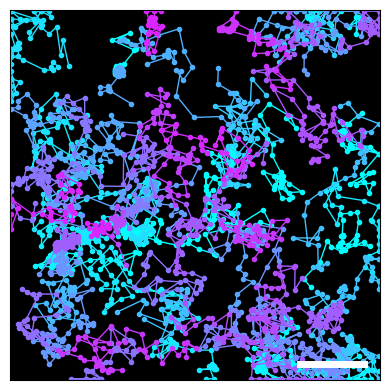

In [19]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Define file paths for GEM
gem_csv_path = r"Z:\Bisal_Halder_turbo\PROCESSED_DATA\Impact_of_cytoskeleton_on_HOPS_condensates\GEM tracking\GEM_HOPS Cotracking\Representative image\C2-GEM_spots_cropped_reformatted.csv"

# Constants for scalebar
um_per_pixel = 0.117
scalebar_length_um = 1
scalebar_length_pxl = scalebar_length_um / um_per_pixel
scalebar_color = 'white'

# Load CSV file
gem_df = pd.read_csv(gem_csv_path)

# Define total imaging duration in seconds for normalization
total_duration_s = 8

# Prepare colormap normalization based on time
norm = plt.Normalize(0, total_duration_s)

# Start plotting
fig, ax = plt.subplots(figsize=(4, 4), facecolor='white')

# Set only the axes background to black
ax.set_facecolor('black')

# Plot GEM trajectories with color based on appearance time
unique_gem_ids = gem_df["trackID"].unique()
start_times_gem = gem_df.groupby("trackID")["t"].min()

for track_id in unique_gem_ids:
    track_points = gem_df[gem_df["trackID"] == track_id]
    x_gem = track_points["x"].to_numpy(float)
    y_gem = track_points["y"].to_numpy(float)
    
    start_time = start_times_gem.loc[track_id] * 0.04  # Convert start frame to seconds
    color = plt.cm.cool(norm(start_time))

    ax.plot(x_gem, y_gem, '-o', color=color, markersize=3, lw=1)

# Remove axis ticks for a cleaner look
ax.set_xticks([])
ax.set_yticks([])

# Define parameters to ensure square plot
x_min, x_max = gem_df['x'].min(), gem_df['x'].max()
y_min, y_max = gem_df['y'].min(), gem_df['y'].max()

# Ensure equal range on both axes
x_range = x_max - x_min
y_range = y_max - y_min
max_range = max(x_range, y_range)

x_center = (x_max + x_min) / 2
y_center = (y_max + y_min) / 2

# Adjust limits to ensure square plot
x_min, x_max = x_center - max_range / 2, x_center + max_range / 2
y_min, y_max = y_center - max_range / 2, y_center + max_range / 2

ax.set_xlim(x_min, x_max)
ax.set_ylim(y_max, y_min)

# Set the same aspect ratio as the image
ax.set_aspect('equal', adjustable='datalim')

# Manually position the scalebar
base_x = x_max - 10.5  # Adjust this value to move the scalebar horizontally
base_y = y_max - 2  # Adjust this value to move it vertically
ax.plot(
    [base_x, base_x + scalebar_length_pxl],
    [base_y, base_y],
    "-", color=scalebar_color, lw=5
)

plt.tight_layout()

# Save the figure to a file
save_path = r"Z:\Bisal_Halder_turbo\PROCESSED_DATA\Impact_of_cytoskeleton_on_HOPS_condensates\GEM tracking\GEM_HOPS Cotracking\Representative image\GEM_trajectory_square.png"
fig.savefig(save_path, dpi=300, bbox_inches='tight', facecolor='white')

plt.show()

## Trajectories of the HOPS

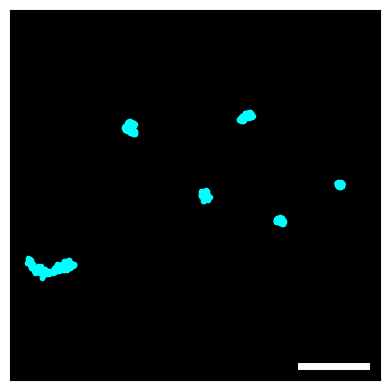

In [16]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Define file paths for GEM and HOPS
gem_csv_path = r"Z:\Bisal_Halder_turbo\PROCESSED_DATA\Impact_of_cytoskeleton_on_HOPS_condensates\GEM tracking\GEM_HOPS Cotracking\Representative image\C2-GEM_spots_cropped_reformatted.csv"
hops_csv_path = r"Z:\Bisal_Halder_turbo\PROCESSED_DATA\Impact_of_cytoskeleton_on_HOPS_condensates\GEM tracking\GEM_HOPS Cotracking\Representative image\C1-HOPS_spots_cropped_reformatted.csv"

# Load CSV files for GEM
gem_df = pd.read_csv(gem_csv_path)

# Calculate x_min and x_max from the GEM data
gem_x_min, gem_x_max = gem_df['x'].min(), gem_df['x'].max()

# Constants for scalebar
um_per_pixel = 0.117
scalebar_length_um = 1
scalebar_length_pxl = scalebar_length_um / um_per_pixel
scalebar_color = 'white'

# Load CSV file for HOPS
hops_df = pd.read_csv(hops_csv_path)

# Start plotting
fig, ax = plt.subplots(figsize=(4, 4), facecolor='white')

# Set only the axes background to black
ax.set_facecolor('black')

# Plot HOPS trajectories without color based on time
unique_hops_ids = hops_df["trackID"].unique()

for track_id in unique_hops_ids:
    track_points = hops_df[hops_df["trackID"] == track_id]
    x_hops = track_points["x"].to_numpy(float)
    y_hops = track_points["y"].to_numpy(float)

    ax.plot(x_hops, y_hops, '-o', color='cyan', markersize=3, lw=1)  # Fixed color for simplicity

# Remove axis ticks for a cleaner look
ax.set_xticks([])
ax.set_yticks([])

# Use the same x_min and x_max from GEM
x_min, x_max = gem_x_min, gem_x_max

# Calculate y_min and y_max to make square
y_min, y_max = hops_df['y'].min(), hops_df['y'].max()

# Ensure equal range on both axes
x_range = x_max - x_min
y_range = y_max - y_min
max_range = max(x_range, y_range)

y_center = (y_max + y_min) / 2

# Adjust limits to ensure square plot
y_min, y_max = y_center - max_range / 2, y_center + max_range / 2

ax.set_xlim(x_min, x_max)
ax.set_ylim(y_max, y_min)

# Set the same aspect ratio as the image
ax.set_aspect('equal', adjustable='datalim')

# Manually position the scalebar
base_x = x_max - 10.5  # Adjust this value to move the scalebar horizontally
base_y = y_max - 2 # Adjust this value to move it vertically
ax.plot(
    [base_x, base_x + scalebar_length_pxl],
    [base_y, base_y],
    "-", color=scalebar_color, lw=5
)

plt.tight_layout()

# Save the figure to a file
save_path = r"Z:\Bisal_Halder_turbo\PROCESSED_DATA\Impact_of_cytoskeleton_on_HOPS_condensates\GEM tracking\GEM_HOPS Cotracking\Representative image\HOPS_trajectory_square.png"
fig.savefig(save_path, dpi=300, bbox_inches='tight', facecolor='white')

plt.show()

## Colormap

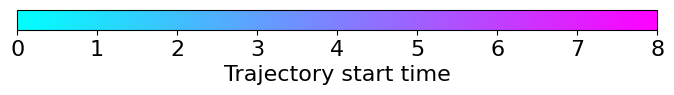

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import os
# Define total imaging duration in seconds
total_duration_s = 8

# Prepare colormap normalization
norm = plt.Normalize(0, total_duration_s)

# Create a figure for the colorbar
fig = plt.figure(figsize=(8, 1))  # Overall length and height for the colorbar

# Define the colormap
cmap = plt.cm.cool

# Create a ScalarMappable
sm = plt.cm.ScalarMappable(cmap=cmap, norm=norm)
sm.set_array([])

# Add colorbar with specific axes size to make it slim
cbar_ax = fig.add_axes([0.1, 0.4, 0.8, 0.2])  # left, bottom, width, height
cbar = fig.colorbar(sm, cax=cbar_ax, orientation='horizontal')
cbar.set_label('Trajectory start time', fontsize=16)
cbar.set_ticks(np.linspace(0, total_duration_s, 9))  # Ticks every second

# Set font size for tick labels
cbar.ax.tick_params(labelsize=16)

plt.show()

# Define the path where you want to save the image
save_path = r"Z:\Bisal_Halder_turbo\PROCESSED_DATA\Impact_of_cytoskeleton_on_HOPS_condensates\GEM tracking\GEM_HOPS Cotracking\Representative image"

# Ensure the directory exists
os.makedirs(save_path, exist_ok=True)

# Save the figure
fig.savefig(os.path.join(save_path, 'colorbar_image.png'), dpi=300, bbox_inches='tight')